# Tugas Prapraktikum

Tugas Prapraktikum dikerjakan dengan _dataset_ [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/download?datasetVersionNumber=2). Tanpa meninjau waktu (`date`), prediksi status hujan pada keesokan harinya (`RainTomorrow`). Berikan nilai `1` jika diprediksi hujan pada keesokan harinya, `0` jika tidak.

<br>
Tugas dikerjakan secara berkelompok. Setiap kelompok terdiri atas 2 (dua) mahasiswa. Kumpulkan paling lambat pada Minggu, 16 April 2023, pukul 23:59 WIB melalui Edunex.

# 0. Persiapan Data and Pustaka

In [1]:
!pip install imbalanced-learn

In [2]:
# Letakkan pustaka di sini.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler
        
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTENC

In [3]:
# Baca data di sini.
rain_data = pd.read_csv('weatherAUS.csv')

# I. Pemahaman Data
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal yang diliputi adalah sebagai berikut:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (_outlier_)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instansi dan fitur)
2. Tipe dari setiap fitur 
3. Banyak nilai unik dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal

In [4]:
#1 Ukuran dari data (instansi dan fitur)
print("Size of dataset is " + str(rain_data.shape[0]) +" rows x " + str(rain_data.shape[1]) + " columns")
print("Number of instances: " + str(rain_data.shape[0]))
print("rain_data: " + str(rain_data.shape[1]-1))
rain_data.head()

Size of dataset is 145460 rows x 23 columns
Number of instances: 145460
rain_data: 22


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
#2 Tipe dari setiap fitur
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#3 Banyak nilai unik dari fitur yang bertipe kategorikal
rain_data["Date"].value_counts() #i dont think date categorical data?

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

In [7]:
rain_data["Location"].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [8]:
rain_data["WindGustDir"].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [9]:
rain_data["WindDir9am"].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [10]:
rain_data["WindDir3pm"].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [11]:
rain_data["RainToday"].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [12]:
#4 Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal
rain_data[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am", "Temp3pm"]].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## I.2
Carilah:
1. Nilai hilang (_missing_) dari setiap fitur
2. Nilai pencilan (_outlier_) dari setiap fitur

In [13]:
#1. Nilai missing dari setiap fitur
rain_data.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [14]:
#2. Nilai pencilan dari setiap fitur
numeric_data = rain_data[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am", "Temp3pm"]]
LowOutliner = 0
HighOutliner = 0

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))
print(outliers.sum())

MinTemp             54
MaxTemp            489
Rainfall         25578
Evaporation       1995
Sunshine             0
WindGustSpeed     3092
WindSpeed9am      1817
WindSpeed3pm      2523
Humidity9am       1425
Humidity3pm          0
Pressure9am       1191
Pressure3pm        919
Cloud9am             0
Cloud3pm             0
Temp9am            262
Temp3pm            764
dtype: int64


## I.3
Lakukan:
1. Pencarian korelasi antarfitur
2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)

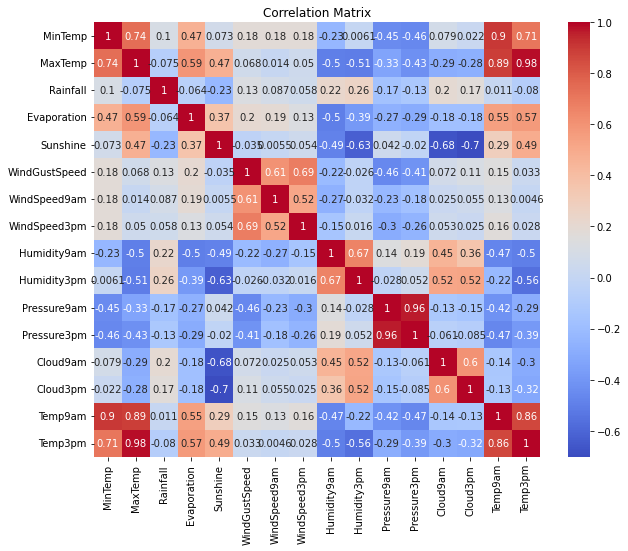

In [15]:
#1 Pencarian korelasi antarfitur
corr = rain_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

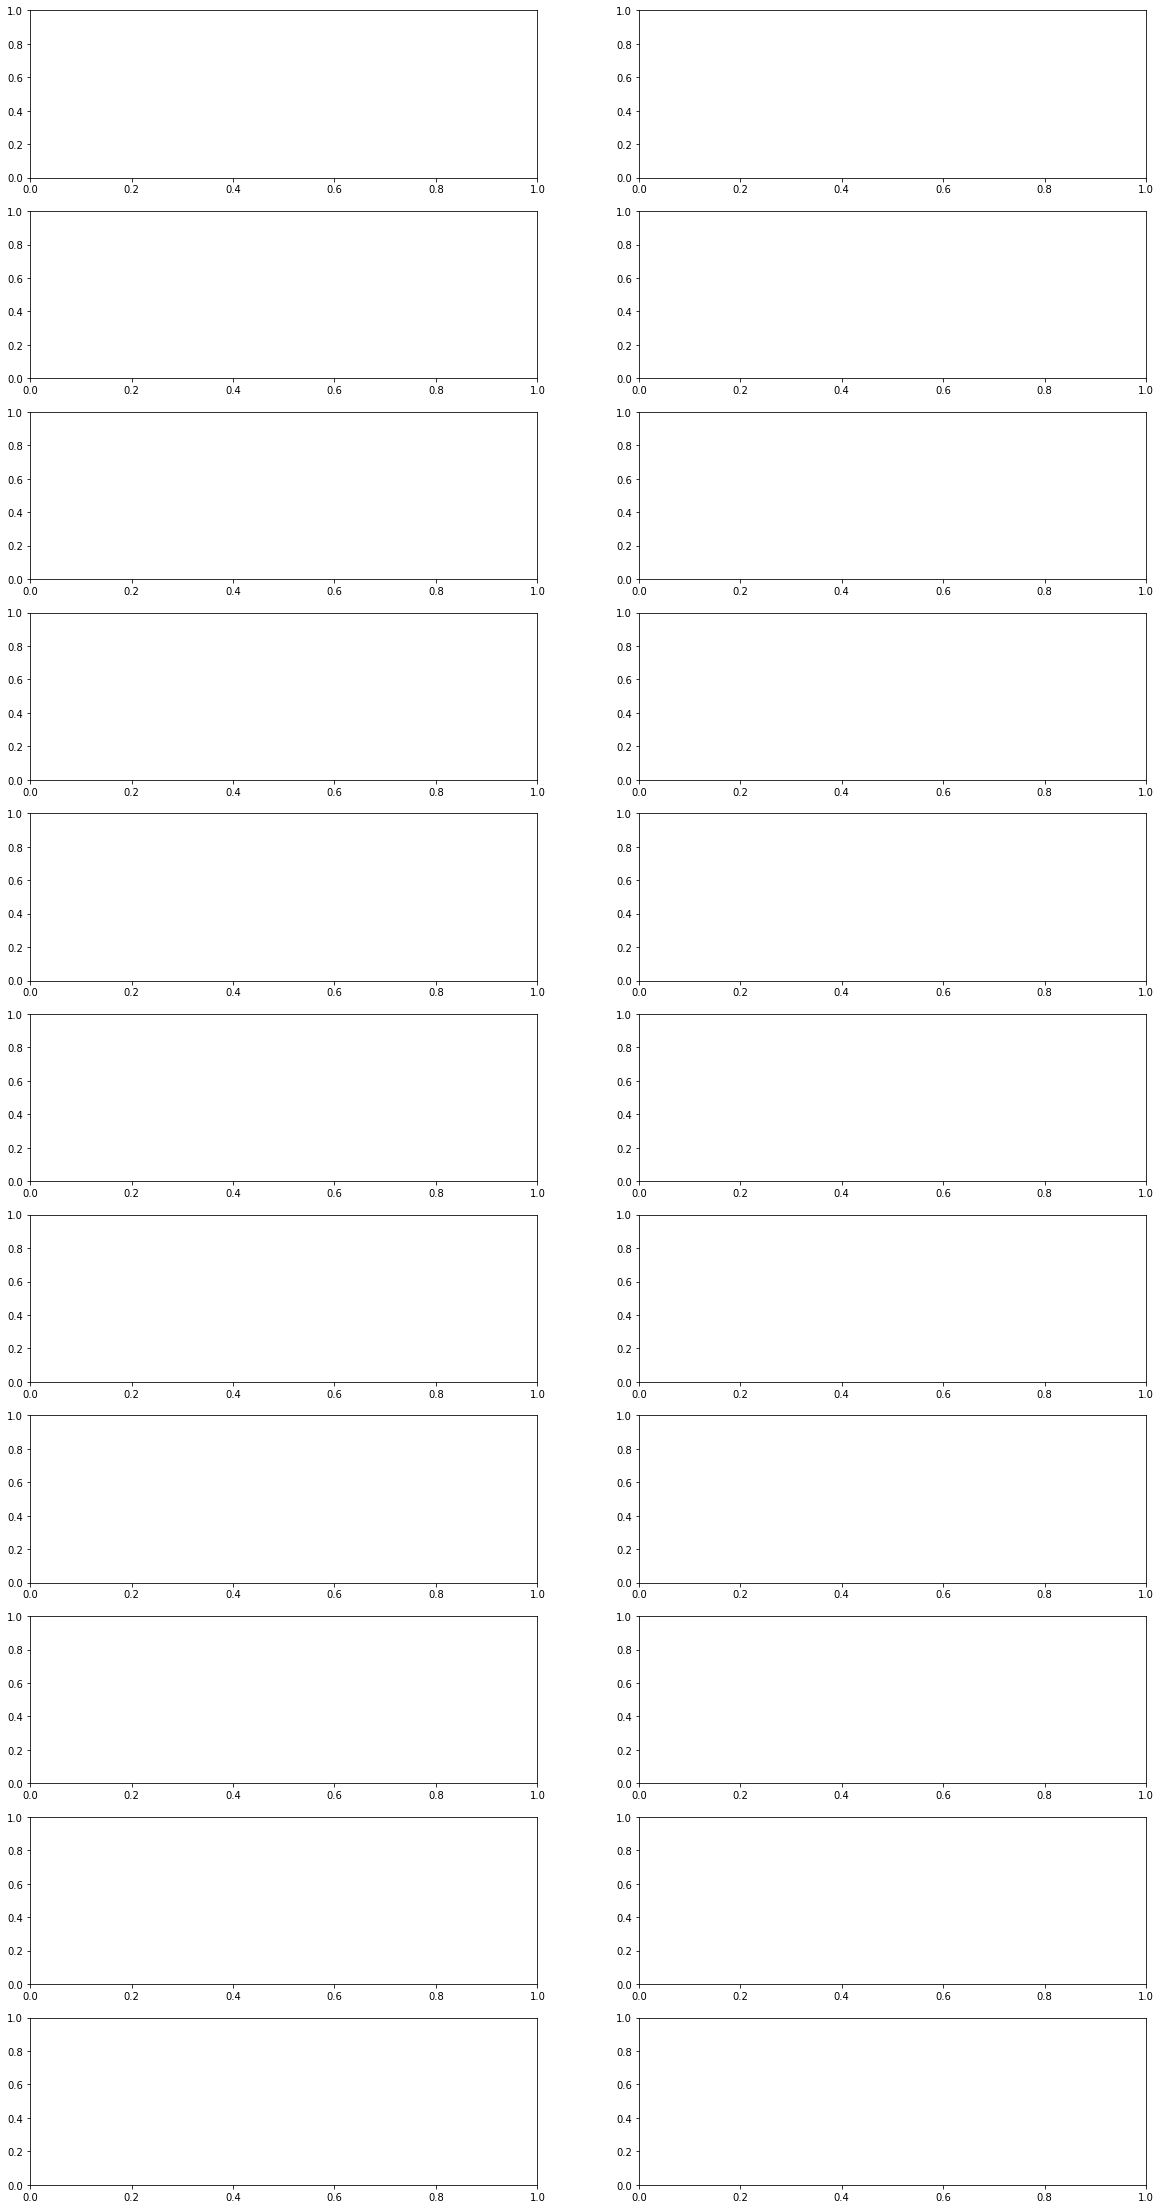

In [16]:
# 2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
columns = ["Date","Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RainToday"]

fig, axs = plt.subplots(11, 2, figsize=(20, 40))
j = 0
for i in range(len(columns)):
    sns.histplot(rain_data, x=columns[i], ax=axs[(i % 10), j])
    if (i%11) == 10:
        j += 1  

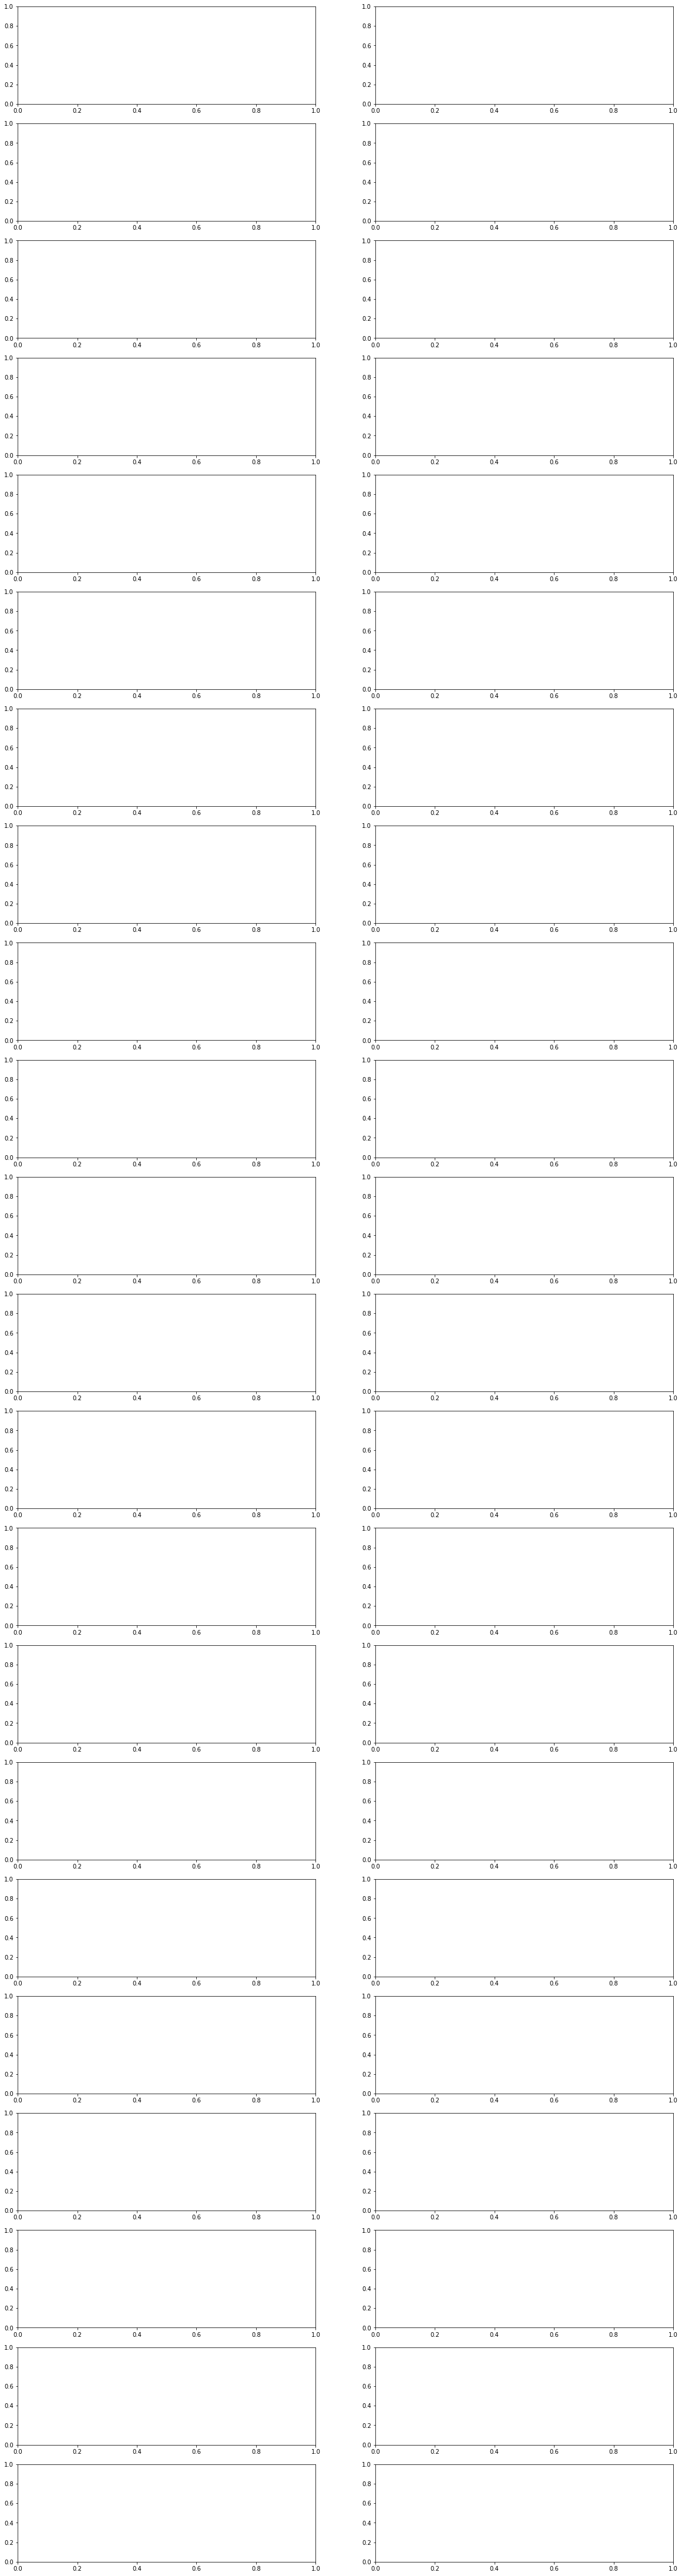

In [17]:
# 3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)
yes_data = rain_data[rain_data["RainTomorrow"] == "Yes"]
no_data = rain_data[rain_data["RainTomorrow"] == "No"]

fig, axs = plt.subplots(22, 2, figsize=(20, 80))

for i in range(len(columns)):
    sns.histplot(yes_data, x=(columns[i]), ax=axs[(i), 0])
    sns.histplot(no_data, x=(columns[i]), ax=axs[(i), 1])

## I.4
Lakukanlah analisis lebih lanjut jika diperlukan, kemudian lakukan hal berikut:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan nilai hilang
4. Transformasi data kategorikal menjadi numerikal (_encoding_)
5. _Scaling_ dengan `MinMaxScaler`

1. Penambahan fitur jika memungkinkan
#####Tidak ada

2.Pembuangan fitur yang menurut kalian tidak dibutuhkan

In [18]:
rain_data = rain_data.drop(["Date", "Location"], axis=1)

3. Penanganan nilai hilang

In [19]:
#MinTemp 
median = rain_data.median(numeric_only=True)['MinTemp']
rain_data['MinTemp'] = rain_data['MinTemp'].fillna(median)

#MaxTemp
median = rain_data.median(numeric_only=True)['MaxTemp']
rain_data['MaxTemp'] = rain_data['MaxTemp'].fillna(median)

#Rainfall
median = rain_data.median(numeric_only=True)['Rainfall']
rain_data['Rainfall'] = rain_data['Rainfall'].fillna(median)

#Evaporation
median = rain_data.median(numeric_only=True)['Evaporation']
rain_data['Evaporation'] = rain_data['Evaporation'].fillna(median)

#Sunshine
median = rain_data.median(numeric_only=True)['Sunshine']
rain_data['Sunshine'] = rain_data['Sunshine'].fillna(median)

#WindGustSpeed
median = rain_data.median(numeric_only=True)['WindGustSpeed']
rain_data['WindGustSpeed'] = rain_data['WindGustSpeed'].fillna(median)

#WindSpeed9am
median = rain_data.median(numeric_only=True)['WindSpeed9am']
rain_data['WindSpeed9am'] = rain_data['WindSpeed9am'].fillna(median)

#WindSpeed3pm
median = rain_data.median(numeric_only=True)['WindSpeed3pm']
rain_data['WindSpeed3pm'] = rain_data['WindSpeed3pm'].fillna(median)

#Humidity9am
median = rain_data.median(numeric_only=True)['Humidity9am']
rain_data['Humidity9am'] = rain_data['Humidity9am'].fillna(median)

##Humidity3pm
median = rain_data.median(numeric_only=True)['Humidity3pm']
rain_data['Humidity3pm'] = rain_data['Humidity3pm'].fillna(median)

#Pressure9am
median = rain_data.median(numeric_only=True)['Pressure9am']
rain_data['Pressure9am'] = rain_data['Pressure9am'].fillna(median)

#Pressure3pm
median = rain_data.median(numeric_only=True)['Pressure3pm']
rain_data['Pressure3pm'] = rain_data['Pressure3pm'].fillna(median)

#Cloud9am
median = rain_data.median(numeric_only=True)['Cloud9am']
rain_data['Cloud9am'] = rain_data['Cloud9am'].fillna(median)

#Cloud3pm
median = rain_data.median(numeric_only=True)['Cloud3pm']
rain_data['Cloud3pm'] = rain_data['Cloud3pm'].fillna(median)

#Temp9am
median = rain_data.median(numeric_only=True)['Temp9am']
rain_data['Temp9am'] = rain_data['Temp9am'].fillna(median)

#Temp3pm
median = rain_data.median(numeric_only=True)['Temp3pm']
rain_data['Temp3pm'] = rain_data['Temp3pm'].fillna(median)

#WindGustDir 
modus = rain_data.mode()['WindGustDir'][0]
rain_data['WindGustDir'] = rain_data['WindGustDir'].fillna(modus)

# WindDir9am
modus = rain_data.mode()['WindDir9am'][0]
rain_data['WindDir9am'] = rain_data['WindDir9am'].fillna(modus)

# WindDir3pm
modus = rain_data.mode()['WindDir3pm'][0]
rain_data['WindDir3pm'] = rain_data['WindDir3pm'].fillna(modus)

# RainToday
modus = rain_data.mode()['RainToday'][0]
rain_data['RainToday'] = rain_data['RainToday'].fillna(modus)

# RainTomorrow
modus = rain_data.mode()['RainTomorrow'][0]
rain_data['RainTomorrow'] = rain_data['RainTomorrow'].fillna(modus)

4. Transformasi data kategorikal menjadi numerikal (encoding)

In [20]:
from sklearn.preprocessing import LabelEncoder
# inisiasi objek LabelEncoder
le = LabelEncoder()

#WindGustDir 
rain_data['WindGustDir'] = le.fit_transform(rain_data['WindGustDir'])

#WindDir9am
rain_data['WindDir9am'] = le.fit_transform(rain_data['WindDir9am'])

#WindDir3pm
rain_data['WindDir3pm'] = le.fit_transform(rain_data['WindDir3pm'])

#RainToday
rain_data['RainToday'] = le.fit_transform(rain_data['RainToday'])

#RainTomorrow
rain_data['RainTomorrow'] = le.fit_transform(rain_data['RainTomorrow'])

5.Scaling dengan MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
rain_data = pd.DataFrame(scale.fit_transform(rain_data), columns=rain_data.columns)

rain_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.516509,0.523629,0.001617,0.033103,0.57931,0.866667,0.294574,0.866667,0.933333,0.153846,...,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0.0,0.0
1,0.375000,0.565217,0.000000,0.033103,0.57931,0.933333,0.294574,0.400000,1.000000,0.030769,...,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0.0,0.0
2,0.504717,0.576560,0.000000,0.033103,0.57931,1.000000,0.310078,0.866667,1.000000,0.146154,...,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0.0,0.0
3,0.417453,0.620038,0.000000,0.033103,0.57931,0.266667,0.139535,0.600000,0.000000,0.084615,...,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0.0,0.0
4,0.613208,0.701323,0.002695,0.033103,0.57931,0.866667,0.271318,0.066667,0.466667,0.053846,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.266509,0.533081,0.000000,0.033103,0.57931,0.000000,0.193798,0.600000,0.066667,0.100000,...,0.51,0.24,0.728926,0.6912,0.555556,0.555556,0.364979,0.533589,0.0,0.0
145456,0.285377,0.568998,0.000000,0.033103,0.57931,0.400000,0.124031,0.600000,0.200000,0.100000,...,0.56,0.21,0.710744,0.6720,0.555556,0.555556,0.381857,0.573896,0.0,0.0
145457,0.327830,0.599244,0.000000,0.033103,0.57931,0.200000,0.240310,0.600000,0.933333,0.069231,...,0.53,0.24,0.669421,0.6352,0.555556,0.555556,0.415612,0.604607,0.0,0.0
145458,0.384434,0.601134,0.000000,0.033103,0.57931,0.600000,0.170543,0.666667,0.200000,0.100000,...,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,0.0,0.0


# II. Desain Eksperimen
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal yang diliputi adalah sebagai berikut:
1. Pembuatan model
2. Proses validasi
3. _Hyperparameter tuning_

## II.1
Tentukanlah metrik yang akan digunakan pada eksperimen kali ini. Metrik yang dapat lebih dari satu jenis.

Accuracy, F1, Precision, Recall

## II.2 
Bagi data dengan perbandingan 0,8 untuk data latih dan 0,2 untuk data validasi.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

clasification = rain_data['RainTomorrow']
rain_data = rain_data.drop(["RainTomorrow"], axis=1)

X_train, X_test, y_train, y_test = train_test_split( rain_data,clasification, test_size=0.2, random_state=42)


## II.3
Lakukan hal berikut:
1. Prediksi dengan menggunakan model _logistic regression_ sebagai _baseline_.
2. Tampilkan evaluasi dari model yang dibangun dari metrik yang ditentukan pada II.1
3. Tampilkan _confusion matrix_.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred)
print('Precision:', precision)

recall = recall_score(y_test, y_pred)
print('Recall:', recall)

f1 = f1_score(y_test, y_pred)
print('F1:', f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.8423621614189468
Precision: 0.7175047438330171
Recall: 0.471183800623053
F1: 0.5688228657389997


array([[21481,  1191],
       [ 3395,  3025]], dtype=int64)

## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. _Hyperparameter tuning_ untuk model yang dipakai dengan menggunakan _grid search_ (perhatikan _random factor_ pada beberapa algoritma model)
3. Validasi dengan _cross validation_


# III. Improvement
Pada bagian ini, kalian diharapkan dapat:
1. melakukan pelatihan dengan data hasil _oversampling_ / _undersampling_, disertai dengan validasi yang benar; serta
2. menerapkan beberapa metode untuk menggabungkan beberapa model.

Kedua hal ini adalah contoh metode untuk meningkatkan kinerja dari model.

## III.1
Lakukanlah:
1. _Oversampling_ pada kelas minoritas pada data latih
2. _Undersampling_ pada kelas mayoritas pada data latih

Pada setiap tahap, latih dengan model *baseline* (II.3), dan validasi dengan data validasi. Data latih dan validasi adalah data yang disusun pada bagian II.2.

In [24]:
#1. _Oversampling_ pada kelas minoritas pada data latih
categorical_features =  categorical_features = [5, 7, 8, 19]

smote_nc = SMOTENC(categorical_features=categorical_features)


X_over, y_over = smote_nc.fit_resample(X_train, y_train)

model.fit(X_over, y_over)
y_pred = model.predict(X_test)

In [25]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7855767908703424
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     22672
         1.0       0.51      0.76      0.61      6420

    accuracy                           0.79     29092
   macro avg       0.72      0.78      0.73     29092
weighted avg       0.83      0.79      0.80     29092



In [26]:
#2. _Undersampling_ pada kelas mayoritas pada data latih

undersample = RandomUnderSampler(sampling_strategy="majority",random_state=0)

X_over, y_over = undersample.fit_resample(X_train, y_train)

model.fit(X_over, y_over)
y_pred = model.predict(X_test)

In [27]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7858861542692149
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     22672
         1.0       0.51      0.76      0.61      6420

    accuracy                           0.79     29092
   macro avg       0.72      0.78      0.73     29092
weighted avg       0.83      0.79      0.80     29092



## III.2
Lakukanlah:
1. Eksplorasi _soft voting_, _hard voting_, dan _stacking_.
2. Buatlah model _logistic regression_ dan SVM.
3. Lakukanlah _soft voting_ dari model-model yang dibangun pada poin 2.
4. Lakukan _hard voting_ dari model-model yang dibangun pada poin 2.
5. Lakukanlah _stacking_ dengan _final classifier_ adalah _logistic regression_ dari model-model yang dibangun pada poin 2.
6. Lakukan validasi dengan metrics yang telah ditentukan untuk poin 3, 4, dan 5.

1 Eksplorasi _soft voting_, _hard voting_, dan _stacking_.

Ketiga teknik tersebut digunakan untuk menggabungkan beberapa model dengan harapan untuk meningkatkan akurasi serta metrik lainnya yang digunakan untuk menilai prediksi.

Soft Voting adalah teknik dimana tiap model diambil prediksi-nya setelah memfaktorkan Weight(distribusi probabilitas) dari model tersebut, prediksi tersebut lalu digunakan untuk melakukan voting prediksi.
Hard Voting adalah teknik dimana tiap model diambil prediksi-nya tanpa memfaktorkan Weight(weight seluruh model sama), prediksi tersebut lalu digunakan untuk melakukan voting prediksi.
Stacking adalah teknik kompleks dimana dibuat sebuah meta-model tambahan yang digunakan untuk menkombinasi prediksi dari model-model awal. Model-model awal ditrain menggunakan data original, dan meta-model ditrain menggunakan model-model awal.

In [38]:
# 2. Buatlah model _logistic regression_ dan SVM.
logR = LogisticRegression(max_iter=1500)
clf = svm.SVC(kernel='linear',probability=True,max_iter=1500)

In [39]:
 #3. Lakukanlah _soft voting_ dari model-model yang dibangun pada poin 2.\n",
softvoting = VotingClassifier(estimators=[('lr', logR), ('svm', clf)], voting='soft')
softvoting.fit(X_train, y_train)

C:\Users\Furniture\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1500)),
                             ('svm',
                              SVC(kernel='linear', max_iter=1500,
                                  probability=True))],
                 voting='soft')

In [30]:
# 4. Lakukan _hard voting_ dari model-model yang dibangun pada poin 2.\n",
hardvoting = VotingClassifier(estimators=[('lr', logR), ('svm', clf)], voting='hard')
hardvoting.fit(X_train, y_train)

C:\Users\Furniture\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=500)),
                             ('svm',
                              SVC(kernel='linear', max_iter=500,
                                  probability=True))])

In [31]:
# 5. Lakukanlah _stacking_ dengan _final classifier_ adalah _logistic regression_ dari model-model yang dibangun pada poin 2.\n",
stacking = StackingClassifier(estimators=[('lr', logR), ('svm', clf)], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)

C:\Users\Furniture\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Furniture\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Furniture\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Furniture\AppData\Local\Packages\PythonSoft

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=500)),
                               ('svm',
                                SVC(kernel='linear', max_iter=500,
                                    probability=True))],
                   final_estimator=LogisticRegression())

In [42]:
#6. Lakukan validasi dengan metrics yang telah ditentukan untuk poin 3, 4, dan 5.
y_test_soft = softvoting.predict(X_test)
y_test_hard = hardvoting.predict(X_test)
y_test_stacking = stacking.predict(X_test)

print(accuracy_score(y_test_soft, y_pred))
print(classification_report(y_test_soft, y_pred))


0.800941839681012
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     25294
         1.0       0.40      1.00      0.57      3798

    accuracy                           0.80     29092
   macro avg       0.70      0.89      0.72     29092
weighted avg       0.92      0.80      0.83     29092



In [41]:
print(accuracy_score(y_test_hard, y_pred))
print(classification_report(y_test_hard, y_pred))

0.7656056647875704
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     26322
         1.0       0.29      1.00      0.45      2770

    accuracy                           0.77     29092
   macro avg       0.64      0.87      0.65     29092
weighted avg       0.93      0.77      0.81     29092



In [40]:

print(accuracy_score(y_test_stacking, y_pred))
print(classification_report(y_test_stacking, y_pred))

0.8079197030111371
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.87     25091
         1.0       0.42      1.00      0.59      4001

    accuracy                           0.81     29092
   macro avg       0.71      0.89      0.73     29092
weighted avg       0.92      0.81      0.84     29092



# IV. Analisis
Bandingkan hasil dari hal-hal berikut:
1. Model _baseline_ (II.3)
2. Model lain (II.4)
3. Hasil _undersampling_
4. Hasil _oversampling_
5. Hasil _soft voting_
6. Hasil _hard voting_
7. Hasil _stacking_

(Tuliskan jawaban bagian IV di sini.)